# Contents

-    [1. Visualization of skull stripping results](#1)    
                              
-    [2. Visualization example for rescaling](#2)    

-    [3. Visualization of Statistical Proccess ](#3)         
        [3.1 Table for parameters' numbers change after each analysis](#3.1) 
        [3.2 Visualization of MRC analysis](#3.2) 

-    [4. Visualization of Suspected Epileptic Foci  ](#4) 

-    [5. Visualization of true/false positives ](#5) 

-    [6. Compare estimated EF coordinates between parameters ](#6)




In [4]:
import os
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib as mpl

In [5]:
from ipynb.fs.full.visualization_helper_functions import *
from ipynb.fs.full.project_helper_functions_classes import create_folder

<a name='1'></a>
## 1. Visualization of skull stripping results

In [3]:
case_file = 'case1.nii.gz'
case_folder = 't1_tra'
situation = 'controls'
original_data_folder = 'data/ordered_data'
stripped_data_folder = 'data/stripped_data'

## specify original case file path
original_case_file = os.path.join(original_data_folder, situation, case_folder, case_file)
original_case_data = nib.load(original_case_file)
original_array = original_case_data.get_fdata() 

## specify stripped case file path
stripped_case_file = os.path.join(stripped_data_folder, situation, case_folder, case_file)
stripped_case_data = nib.load(stripped_case_file)
stripped_array = stripped_case_data.get_fdata() 

In [4]:
## by changing slice index you can set correct view
explore_3D_array_with_mask(arr = original_array, mask = stripped_array, slice_ind = 2)

interactive(children=(IntSlider(value=12, description='SLICE', max=24), Output()), _dom_classes=('widget-inter…

For saving figure, add following statements and specify figure path in to the paranthesis:

save_figure = True, figure_path = ''

Example :
figure_original_and_stripped_slice(original_array[:,:,13], stripped_array[:,:,13],
                                  title1 = 'original slice', title2 = 'slice after skull stripping',
                                  save_figure = True, figure_path = 'output/skull_stripped_figure.png')


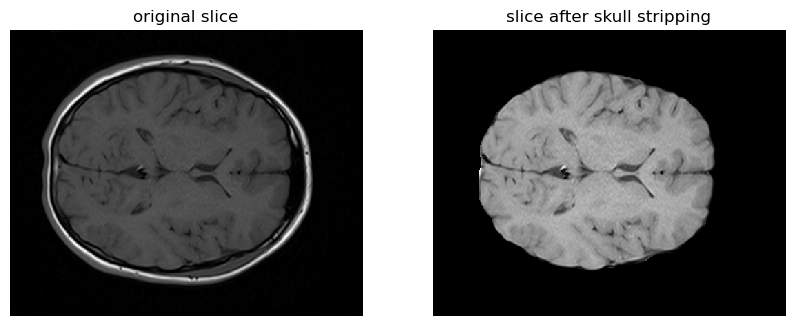

In [5]:
figure_original_and_stripped_slice(original_array[:,:,13], stripped_array[:,:,13],
                                  title1 = 'original slice', title2 = 'slice after skull stripping')

<a name='2'></a>
## 2. Visualization example for rescaling

For saving figure, add following statements and specify figure path in to the paranthesis:

save_figure = True, figure_path = ''

Example :
figure_rescaled_data(stripped_array[:,:,13], rescaled_data[:,:,13], original_array,
                                   title1 = 'stripped slice', title2 = 'rescaled slice',
                                  show_colorbar = True, set_brightness = False,
                                  save_figure = False, figure_path = '.output/rescaled_figure.png')

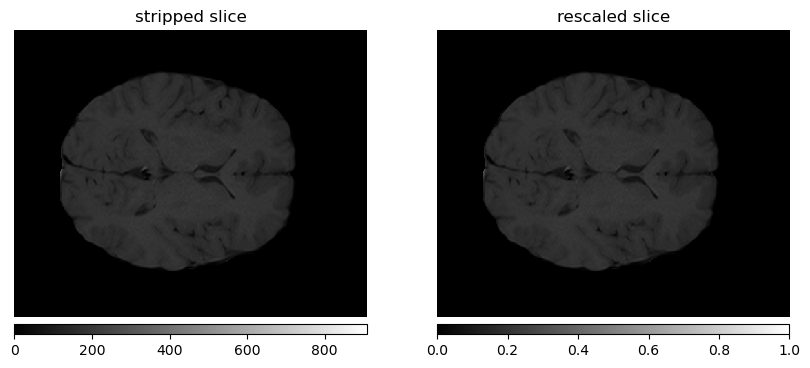

In [6]:
rescaled_data = rescale(stripped_array, np.min(original_array), np.max(original_array))
figure_rescaled_data(stripped_array[:,:,13], rescaled_data[:,:,13], original_array,
                                   title1 = 'stripped slice', title2 = 'rescaled slice',
                                  show_colorbar = True, set_brightness = False)

 <a name='3'></a>
## 3 . Visualization of Statistical Proccess

<a name='3.1'></a>
### 3 .1 Table for parameters' numbers change after each analysis

In [7]:
## specify paths
all_MRC_csv = 'output/MRC_stat_results/auc_values.csv'
all_MRC_collective_csv = 'output/MRC_stat_results/auc_values_collective.csv'
MRC_meaningful_csv = 'output/MRC_stat_results/meaningful_stats.csv'
MRC_meaningful_collective_csv = 'output/MRC_stat_results/meaningful_collective_stats.csv'
MRC_selected = 'output/MRC_stat_results/selected_features.csv'
MRC_collective_selected = 'output/MRC_stat_results/selected_features_coll.csv'
EPE_selected = 'output/EPE_stat_results/EPE_selected_features.csv'

## load data
df0 = pd.read_csv(all_MRC_csv)
df_coll0 = pd.read_csv(all_MRC_collective_csv)
df1 = pd.read_csv(MRC_meaningful_csv)
df_coll1 = pd.read_csv(MRC_meaningful_collective_csv)
df2 = pd.read_csv(MRC_selected)
df_coll2 = pd.read_csv(MRC_collective_selected)
df3 = pd.read_csv(EPE_selected)

In [8]:
columns = ['MRI_type', 'Start', 'MRC_analysis', 'Power_analysis', 'EPE_analysis']
proccess_trace = pd.DataFrame(columns = columns)

MRI_types = df0['MRI_type'].unique()
sequences = df_coll0['sequence'].unique()

for MRI_type in MRI_types:
    start_number = df0['MRI_type'][df0['MRI_type'] == MRI_type].count()
    meaningful_feature_number = df1['MRI_type'][df1['MRI_type'] == MRI_type].count()
    after_power_analysis = df2['MRI_type'][df2['MRI_type'] == MRI_type].count()
    after_EPE = df3['MRI_type'][df3['MRI_type'] == MRI_type].count()
    data = [[MRI_type, start_number, meaningful_feature_number, after_power_analysis, after_EPE]]
    temp_df = pd.DataFrame(data = data, columns = columns)
    proccess_trace = pd.concat([proccess_trace, temp_df])
    
for sequence in sequences:
    start_number = df_coll0['sequence'][df_coll0['sequence'] == sequence].count()
    meaningful_feature_number = df_coll1['sequence'][df_coll1['sequence'] == sequence].count()
    after_power_analysis = df_coll2['sequence'][df_coll2['sequence'] == sequence].count()
    after_EPE = df3['MRI_type'][df3['MRI_type'] == sequence].count()
    data = [[sequence, start_number, meaningful_feature_number, after_power_analysis, after_EPE]]
    temp_df = pd.DataFrame(data = data, columns = columns)
    proccess_trace = pd.concat([proccess_trace, temp_df])
    
## save proccess trace
proccess_trace.to_csv('output/procces_trace_results.csv')


<a name='3.2'></a>
### 3.2 Visualization of MRC analysis

In [ ]:
## print MRC analysis feature number and maximum AUC results

MRI_types = df0['MRI_type'].unique()
sequences = df_coll0['sequence'].unique()

for MRI_type in MRI_types:
    meaningful_feature_number = df0['MRI_type'][df0['MRI_type'] == MRI_type].count()
    max_AUC = df0['AUC_value'][df0['MRI_type'] == MRI_type].max()
    print(f" {MRI_type} meaningful feature number :  {meaningful_feature_number},  maximum AUC : {max_AUC}")
    
for sequence in sequences:
    meaningful_feature_number = df_coll0['sequence'][df_coll0['sequence'] == sequence].count()
    max_AUC = df_coll0['AUC_value'][df_coll0['sequence'] == sequence].max()
    print(f" {sequence} meaningful feature number :  {meaningful_feature_number},  maximum AUC : {max_AUC}")

In [11]:
# specify MRI data features for creating graph
stat_file_path = 'output/MRC_stat_results/auc_values_collective.csv'
stat_df = pd.read_csv(stat_file_path)
MRI_column_name = 'sequence'
MRI_type = 't1'
shape = 'square'

For saving figure, add following statements and specify figure path in to the paranthesis:

save_figure = True, figure_path = ''

Example :
figure_MRC_AUC_(stat_file_path, MRI_column_name, MRI_type,  shape, save_figure = True, 
                    figure_path = '.output/t2_sequence_circle_MRC_figure.png')


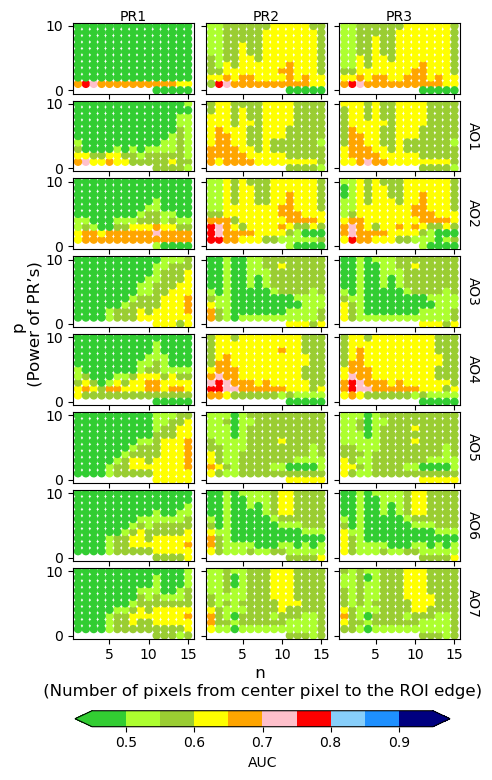

In [12]:
# create figure
figure_MRC_AUC_(stat_file_path, MRI_column_name, MRI_type,  shape)

<a name='4'></a>
## 4. Visualization of Suspected Epileptic Foci 

In [13]:
stripped_data_folder = 'data/stripped_data'
original_data_folder = 'data/ordered_data'
feature_output_folder = 'output/features'
features_csv_path = 'output/EPE_stat_results/EPE_selected_features.csv'
save_figure = False
overview_all_features = False
feature_ind = 1
sequences_dict = {'t1': ['t1_tra', 't1_sag'], 't2' : ['t2_cor', 't2_tra']}
#prepare folder for saving foci images
foci_image_path = create_folder('output/estimated_foci_images')
features_ = pd.read_csv(features_csv_path)

In [14]:
## for overbiew all features pointed foci 
if overview_all_features:
    for feature_ind in range(0, len(features_)):
        efv = epileptic_focus_visualization(stripped_data_folder = stripped_data_folder,
                        original_data_folder = original_data_folder,
                        feature_output_folder = feature_output_folder,
                        features_csv_path = features_csv_path,
                        feature_ind = feature_ind,
                        sequences = sequences_dict)
        efv.show_figure(save_figure = save_figure,  folder_path = foci_image_path)

In [17]:
## for overbiew features seperately
efv = epileptic_focus_visualization(stripped_data_folder = stripped_data_folder,
                original_data_folder = original_data_folder,
                feature_output_folder = feature_output_folder,
                features_csv_path = features_csv_path,
                feature_ind = 2,
                sequences = sequences_dict)
efv.show_figure(save_figure = save_figure,  folder_path = foci_image_path)

<a name='5'></a>
## 5. Visualization of true/false positives

### specifing paths

In [3]:
features_csv_path = 'output/EPE_stat_results/EPE_selected_features.csv'
features_df = pd.read_csv(features_csv_path)
feature_output_folder = 'output/features'
case_info_excel_path = 'output/MRI_informations.xlsx'
control_id = 'controls'
patient_id = 'patients'
sequences_dict = {'t1': ['t1_tra', 't1_sag'], 't2' : ['t2_cor', 't2_tra']}

In [4]:
diagnosis_results =  take_diagnosis_results(features_df, feature_output_folder,
                                            case_info_excel_path, control_id, patient_id,
                                           sequences_dict = sequences_dict)


### create figure

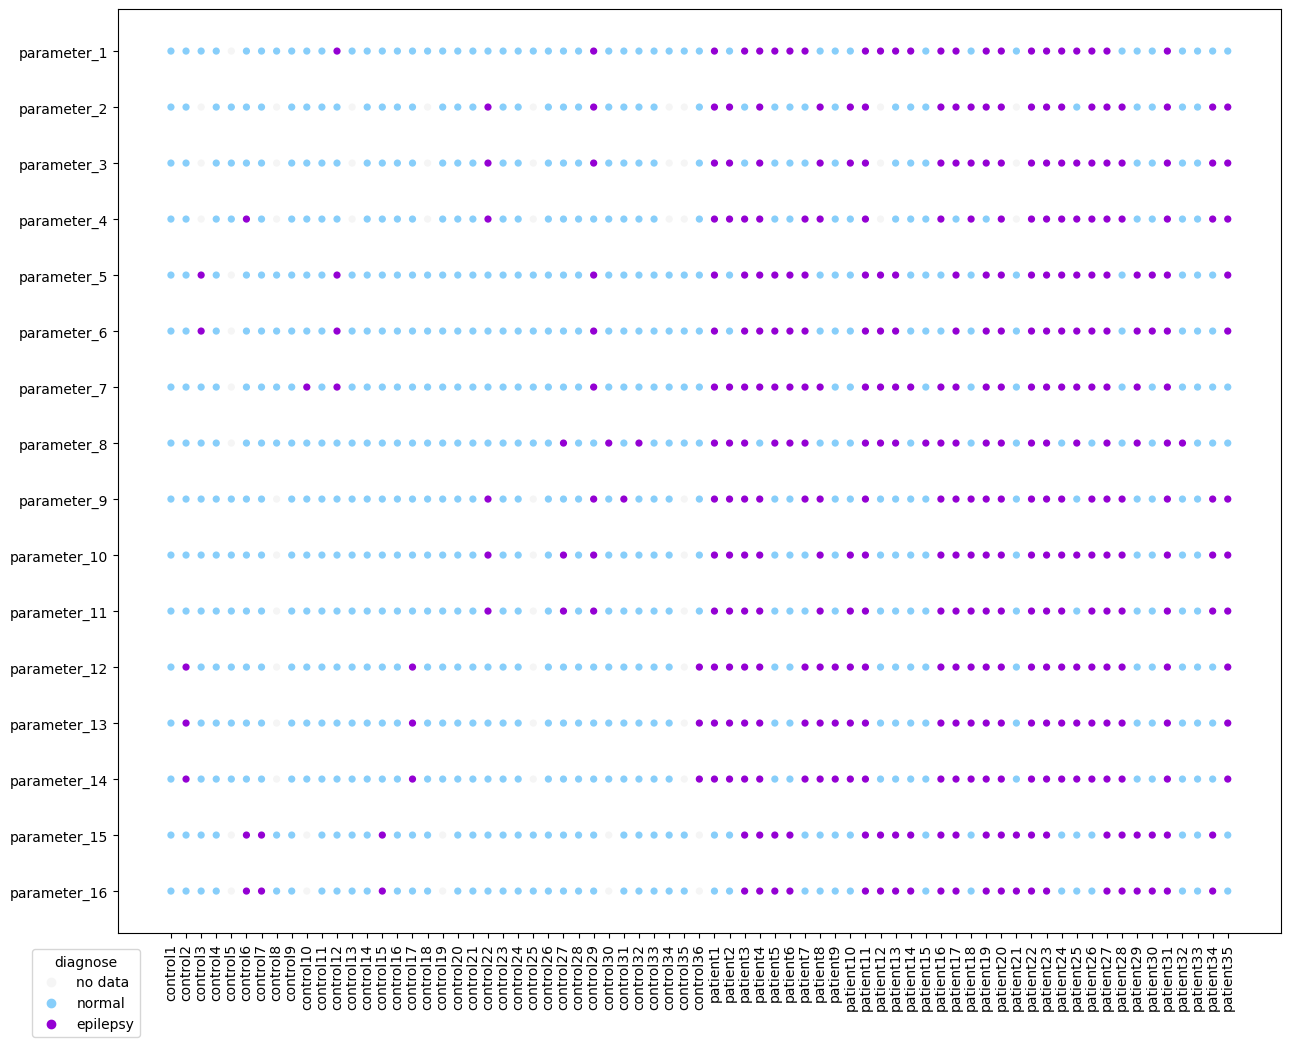

In [5]:
cmap = mpl.colors.ListedColormap([ 'whitesmoke', 'lightskyblue' , 'darkviolet'])
figure_diagnosis(diagnosis_results, figure_size= (15, 12), colormap = cmap, marker_size=70)

### visualization only features indicated foci in brain paranchima

In [6]:
foci_info_csv_path = 'output/EPE_stat_results/EPE_selected_features_foci_places.csv'
df = pd.read_csv(foci_info_csv_path)
non_brain_foci_features_indexes = df[(df['controls_EF_number_in_paranchyma'] == 0) &(df['patients_EF_number_in_paranchyma'] == 0)].index

In [7]:
diagnosis_results =  take_diagnosis_results(features_df, feature_output_folder,
                                            case_info_excel_path, control_id, patient_id,
                                            not_include_features_indexes = non_brain_foci_features_indexes,
                                           sequences_dict = sequences_dict)
print(f' {len(diagnosis_results.keys()) - 1} final features were found')

 9 final features were found


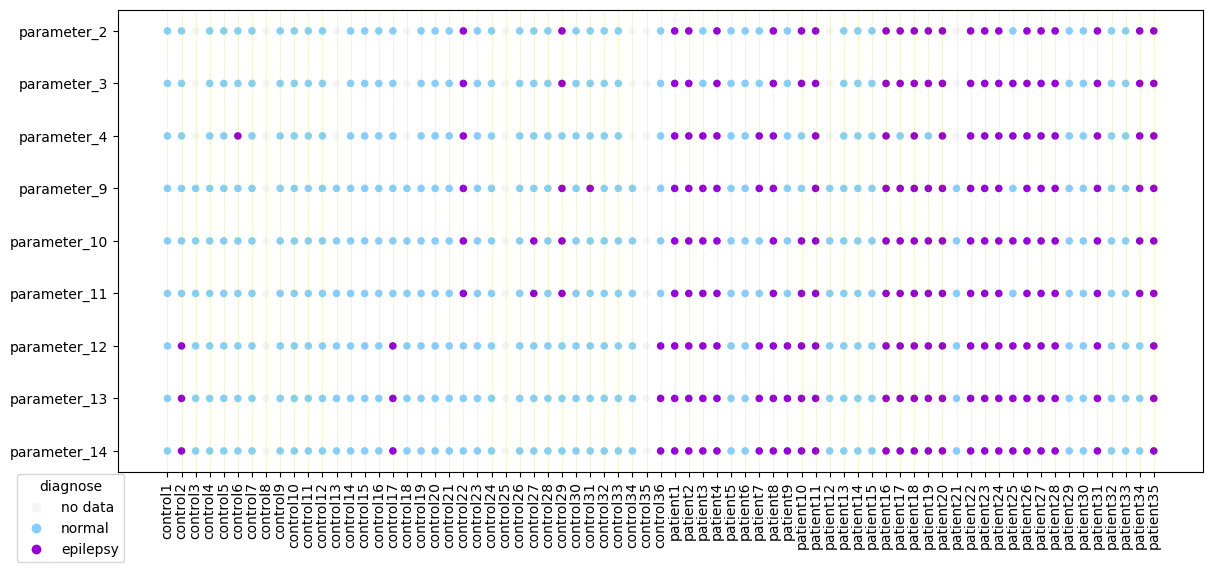

In [8]:
cmap = mpl.colors.ListedColormap([ 'whitesmoke', 'lightskyblue' , 'darkviolet'])
figure_diagnosis(diagnosis_results, figure_size= (14, 6), colormap = cmap, marker_size=80, show_grid = True,
                bbox_to_anchor = (-0.1, -0.21))

### take cases matching list for comparing with EEG results

In [5]:
case_info_excel_path = 'output/MRI_informations.xlsx'
control_id = 'controls'
patient_id = 'patients'

In [8]:
case_matching_df = take_case_matching_list(case_info_excel_path, control_id, patient_id)

In [10]:
## saving dataframe to excel
excel_path = 'output/case_matchings.csv'
case_matching_df.to_csv(excel_path)

<a name='6'></a>
## 6. Compare estimated EF coordinates between parameters

#### by chosing feature indexes you can compare estimated EF coordinates between different parameters . Following algorithm will show you mutual coordinates with choosen features

In [19]:
stripped_data_folder = 'data/stripped_data'
original_data_folder = 'data/ordered_data'
feature_output_folder = 'output/features'
features_csv_path = 'output/EPE_stat_results/EPE_selected_features.csv'
sequences_dict = {'t1': ['t1_tra', 't1_sag'], 't2' : ['t2_cor', 't2_tra']}


In [21]:
## print parameter list
features_df

,MRI_type,shape,primary_rate,secondary_rate,step,power,AUC(MRC),p(MRC),threshold,specificity(EPE),sensitivity(EPE),EF_number_controls,EF_number_patients
0,t2,square,3,5,8,5,0.81,0.0000,4.456125e-10,0.942857,0.600000,3.0,53.0
1,t1_tra,square,2,5,2,2,0.75,0.0007,1.449796e+00,0.931034,0.606061,3.0,122.0
2,t1_tra,square,3,5,2,2,0.74,0.0008,1.729229e+00,0.931034,0.636364,3.0,101.0
3,t1_tra,square,2,5,1,2,0.76,0.0004,6.615221e+00,0.931034,0.606061,2.0,157.0
4,t2,circle,3,2,9,5,0.84,0.0000,2.250526e-10,0.914286,0.628571,3.0,60.0
5,t2,circle,2,2,9,5,0.84,0.0000,2.139961e-10,0.914286,0.628571,3.0,59.0
6,t2,square,2,5,8,5,0.81,0.0000,4.059345e-10,0.914286,0.685714,4.0,57.0
7,t2,square,2,2,6,3,0.81,0.0000,1.031605e-04,0.914286,0.600000,4.0,45.0
8,t1,circle,2,5,2,2,0.73,0.0009,3.374499e+00,0.909091,0.600000,3.0,152.0
9,t1,square,3,5,2,2,0.77,0.0001,1.721401e+00,0.909091,0.628571,4.0,112.0


In [28]:
## choose features

feature_index_list  = [1,2,3]

In [31]:
## prepare dataframe 
features_df = pd.read_csv(features_csv_path)
columns = ['situation', 'coordinates', 'case']
coordinates_df = pd.DataFrame(columns = columns)
for feature_ind in feature_index_list:
    feature_vals = features_df.iloc[feature_ind, :6].values
    feature_pkl_path = take_pkl_file_path(feature_vals, feature_output_folder)
    feature_df = pd.read_pickle(feature_pkl_path)
    threshold = features_df['threshold'].iloc[feature_ind]
    step = features_df['step'].iloc[feature_ind]
    ROI_shape = features_df['shape'].iloc[feature_ind]
    foci_df = feature_df[columns][feature_df['value'] > threshold]
    if len(coordinates_df) == 0:
        coordinates_df = foci_df.copy()
    else:
        coordinates_df = pd.merge(foci_df, coordinates_df, on = columns, how = 'inner')

In [32]:
coordinates_df

,situation,coordinates,case
0,controls,"(7.0, 50.0, 146.0)",case17
1,controls,"(16.0, 75.0, 39.0)",case8
2,patients,"(14.0, 82.0, 133.0)",case17
3,patients,"(15.0, 86.0, 139.0)",case17
4,patients,"(6.0, 84.0, 112.0)",case17
...,...,...,...
154,patients,"(12.0, 89.0, 103.0)",case7
155,patients,"(2.0, 110.0, 108.0)",case28
156,patients,"(15.0, 128.0, 150.0)",case24
157,patients,"(11.0, 116.0, 134.0)",case24
